In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('ChargePoint Data CY20Q4.csv', dtype={'Station Name': str}, parse_dates=['End Date', 'Start Date'], low_memory=False)
df = df.drop(["Org Name", "Country", "Start Time Zone", "End Time Zone"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Station Name                     259415 non-null  object        
 1   MAC Address                      259415 non-null  object        
 2   Start Date                       259415 non-null  datetime64[ns]
 3   End Date                         259415 non-null  object        
 4   Transaction Date (Pacific Time)  259206 non-null  object        
 5   Total Duration (hh:mm:ss)        259415 non-null  object        
 6   Charging Time (hh:mm:ss)         259415 non-null  object        
 7   Energy (kWh)                     259415 non-null  float64       
 8   GHG Savings (kg)                 259415 non-null  float64       
 9   Gasoline Savings (gallons)       259415 non-null  float64       
 10  Port Type                        259406 non-

In [4]:
df.head(5)

,Station Name,MAC Address,Start Date,End Date,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,Address 1,City,State/Province,Postal Code,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-29 20:17:00,7/29/2011 23:20,7/29/2011 23:20,3:03:32,1:54:03,6.249457,2.625,0.784,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 00:00:00,7/30/2011 0:02,7/30/2011 0:02,0:02:06,0:01:54,0.106588,0.045,0.013,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Customer,4,94301.0,4169,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 08:16:00,7/30/2011 12:34,7/30/2011 12:34,4:17:32,4:17:28,14.951777,6.280,1.876,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 14:51:00,7/30/2011 16:55,7/30/2011 16:55,2:03:24,2:02:58,7.159643,3.007,0.899,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Customer,6,94302.0,2545,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 18:51:00,7/30/2011 20:03,7/30/2011 20:03,1:11:24,0:43:54,1.957765,0.822,0.246,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765,NaN,NaN,NaN


In [3]:
def create_hub_name(station):
   hub_name = station.rsplit('/', 1)[1].lstrip().rsplit(' ', 1)[0]
   if hub_name == 'BRYANT #':
      return 'BRYANT'
   else: 
      return hub_name

def count_plugs(station, station_list, no_plug_list):
   no_plugs = len(df['Port Number'].loc[df['Station Name'] == station].unique())
   return no_plugs
   '''if 'SHERMAN' in station:
      return 2
   else: 
      return no_plugs'''

In [4]:
## Add hub colu,n
df['Hub'] = df['Station Name'].apply(create_hub_name)

In [16]:
port_num = []
station_name = []
j = 0
for i in df['Station Name'].unique():
    station_name.append(i)
    df_port_num = df['Port Number'].loc[df['Station Name'] == i].unique()
    port_num.append(int(len(df_port_num)))

plug_per_station = dict(zip(station_name, port_num))


In [17]:
## Poulate variable no. of plugs with plugs pr. unique station
df['No. Plugs'] = np.zeros(len(df))
for key, value in plug_per_station.items():
    df.loc[df['Station Name'] == key, ['No. Plugs']] = value

<Axes: title={'center': 'Total plugin events pr. hub'}, xlabel='Hub'>

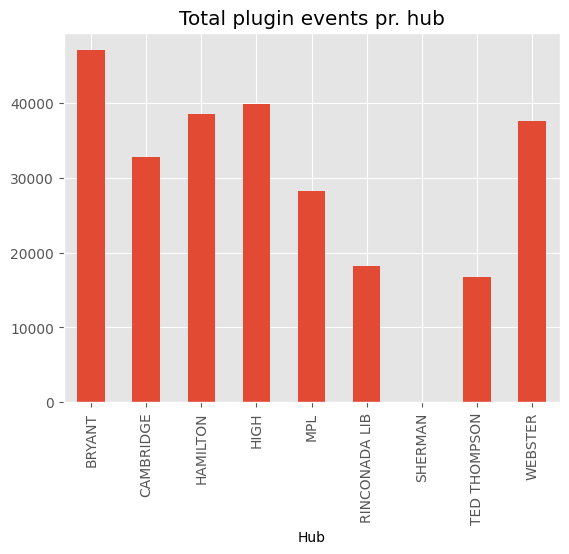

In [8]:
df.groupby('Hub')['Plug In Event Id'].count().plot.bar(title = 'Total plugin events pr. hub')

<Axes: title={'center': 'Total plugs per station'}, xlabel='Station Name'>

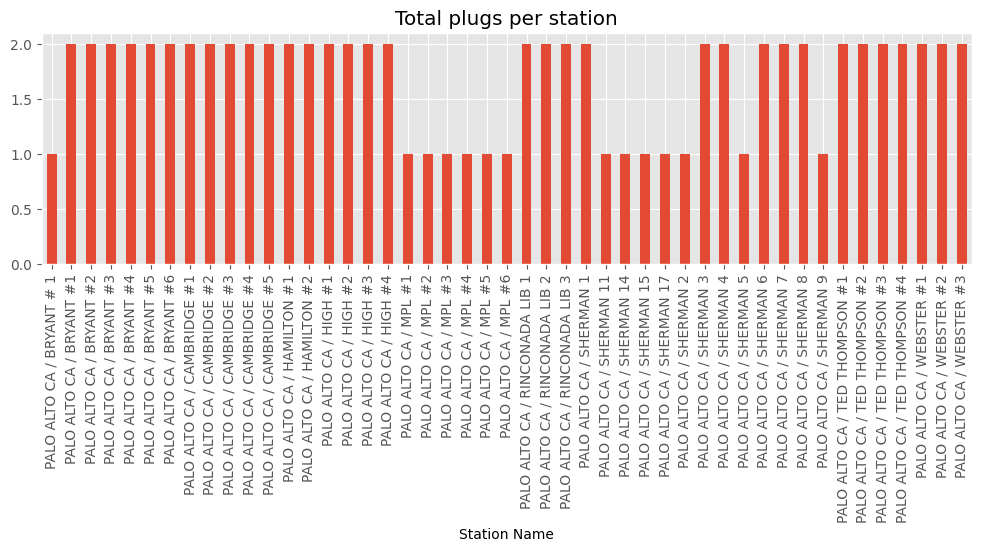

In [22]:
df.groupby('Station Name')['No. Plugs'].first().plot.bar(title = 'Total plugs per station', figsize=(12, 3))

In [52]:
## Find first time a specific plug at a specific station is in use
list_of_first_records = []
for i in df['Station Name'].unique():
    list_of_first_records.append(df[df['Station Name'] == i].iloc[0].values)
df_charging_stations = pd.DataFrame(list_of_first_records)
df_charging_stations = df_charging_stations.set_axis(df.columns.unique().values, axis=1, inplace=False)

C:\Users\s174045\AppData\Local\Temp\ipykernel_13184\2127896843.py:6: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_charging_stations = df_charging_stations.set_axis(df.columns.unique().values, axis=1, inplace=False)


In [61]:
## Count no. of charging stations pr. hub over time
df_charging_stations['No. Stations'] = df_charging_stations.groupby('Hub').cumcount()
df_charging_stations['No. Stations'] = df_charging_stations['No. Stations'] + 1
df_charging_stations['No. Plugs per Hub'] = df_charging_stations.groupby('Hub').cumsum()['No. Plugs']
df_charging_stations_per_hub = df_charging_stations[['Station Name', 'Start Date', 'Port Number', 'Hub', 'No. Stations', 'No. Plugs per Hub']]

C:\Users\s174045\AppData\Local\Temp\ipykernel_13184\1605116821.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_charging_stations['No. Plugs per Hub'] = df_charging_stations.groupby('Hub').cumsum()['No. Plugs']


In [62]:
df_charging_stations

,Station Name,MAC Address,Start Date,End Date,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,Address 1,City,State/Province,Postal Code,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Hub,No. Plugs,No. Stations,No. Plugs per Hub
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-29 20:17:00,7/29/2011 23:20,7/29/2011 23:20,3:03:32,1:54:03,6.249457,2.625,0.784,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284,NaN,NaN,NaN,HAMILTON,2.0,1,2.0
1,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,2011-08-02 12:26:00,8/2/2011 13:27,8/2/2011 13:27,1:00:50,1:00:43,3.516131,1.477,0.441,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444607,-122.160263,USD,0.00,Plug Out at Vehicle,8,NaN,0,NaN,NaN,NaN,HAMILTON,2.0,2,4.0
2,PALO ALTO CA / HIGH #4,000D6F0000A20F47,2011-09-02 20:42:00,9/2/2011 22:26,9/2/2011 22:26,1:43:25,1:43:08,6.403768,2.690,0.804,Level 2,2,J1772,NaN,528 High St,Palo Alto,California,94301,37.443676,-122.162880,NaN,0.00,Customer,3,94065.0,5775,NaN,NaN,NaN,HIGH,2.0,1,2.0
3,PALO ALTO CA / BRYANT #2,000D6F0000A2108E,2011-10-10 15:23:00,10/10/2011 15:23,10/10/2011 15:23,4:34:38,2:37:06,9.155255,3.845,1.149,Level 2,2,J1772,NaN,Bryant St,Palo Alto,California,94301,37.446373,-122.162331,USD,0.00,Customer,6,94303.0,4595,NaN,NaN,NaN,BRYANT,2.0,1,2.0
4,PALO ALTO CA / BRYANT #1,000D6F0000A20D9E,2011-10-13 12:49:00,10/13/2011 13:16,10/13/2011 13:17,0:26:56,0:26:49,1.630508,0.685,0.205,Level 2,2,J1772,NaN,Bryant St,Palo Alto,California,94301,37.446373,-122.162331,USD,0.00,Customer,12,94303.0,4595,NaN,NaN,NaN,BRYANT,2.0,2,4.0
5,PALO ALTO CA / MPL #4,000D6F000154FB5F,2014-09-24 08:26:00,9/24/2014 8:31,9/24/2014 8:31,0:04:44,0:04:18,0.218730,0.092,0.027,Level 2,1,J1772,NaN,3700 Middlefield Rd,Palo Alto,California,94303,37.422104,-122.113510,USD,0.00,Plug Out at Vehicle,1,95035.0,65213,NaN,NaN,NaN,MPL,1.0,1,1.0
6,PALO ALTO CA / MPL #6,000D6F00015B7509,2014-09-24 08:36:00,9/24/2014 8:39,9/24/2014 8:39,0:03:11,0:02:54,0.141441,0.059,0.018,Level 2,1,J1772,NaN,3700 Middlefield Rd,Palo Alto,California,94303,37.422138,-122.113457,USD,0.00,Plug Out at Vehicle,4,95035.0,65213,NaN,NaN,NaN,MPL,1.0,2,2.0
7,PALO ALTO CA / MPL #2,000D6F000154EF9A,2014-09-24 08:42:00,9/24/2014 8:44,9/24/2014 8:44,0:02:18,0:00:44,0.031177,0.013,0.004,Level 2,1,J1772,NaN,3700 Middlefield Rd,Palo Alto,California,94303,37.422169,-122.112480,USD,0.00,Plug Out at Vehicle,4,95035.0,65213,NaN,NaN,NaN,MPL,1.0,3,3.0
8,PALO ALTO CA / MPL #1,000D6F000154FFDB,2014-09-27 15:54:00,9/27/2014 18:24,9/27/2014 18:24,2:29:32,2:29:20,15.250512,6.405,1.914,Level 2,1,J1772,NaN,3700 Middlefield Rd,Palo Alto,California,94303,37.422146,-122.112511,USD,0.00,Plug Out at Vehicle,1411858458,94301.0,285913,NaN,NaN,NaN,MPL,1.0,4,4.0
9,PALO ALTO CA / MPL #5,000D6F000154FFC5,2014-09-28 10:45:00,9/28/2014 12:21,9/28/2014 12:21,1:36:39,1:02:29,3.907685,1.641,0.490,Level 2,1,J1772,NaN,3700 Middlefield Rd,Palo Alto,California,94303,37.422123,-122.113487,USD,0.00,Customer,4,94306.0,127397,NaN,NaN,NaN,MPL,1.0,5,5.0


In [63]:
## Create df with time and hubs as rows and columns respectively. Filled with number of charging stations
df_hub = df_charging_stations_per_hub.pivot_table(values='No. Stations', index=['Start Date'], columns='Hub', aggfunc='first')
df_hub = df_hub.fillna(0)
df_hub = df_hub.replace(to_replace=0, method='ffill')

In [64]:
df_plug_hub = df_charging_stations_per_hub.pivot_table(values='No. Plugs per Hub', index=['Start Date'], columns='Hub', aggfunc='first')
df_plug_hub = df_plug_hub.fillna(0)
df_plug_hub = df_plug_hub.replace(to_replace=0, method='ffill')

<Axes: title={'center': 'No. of stations pr. hub'}, xlabel='Start Date'>

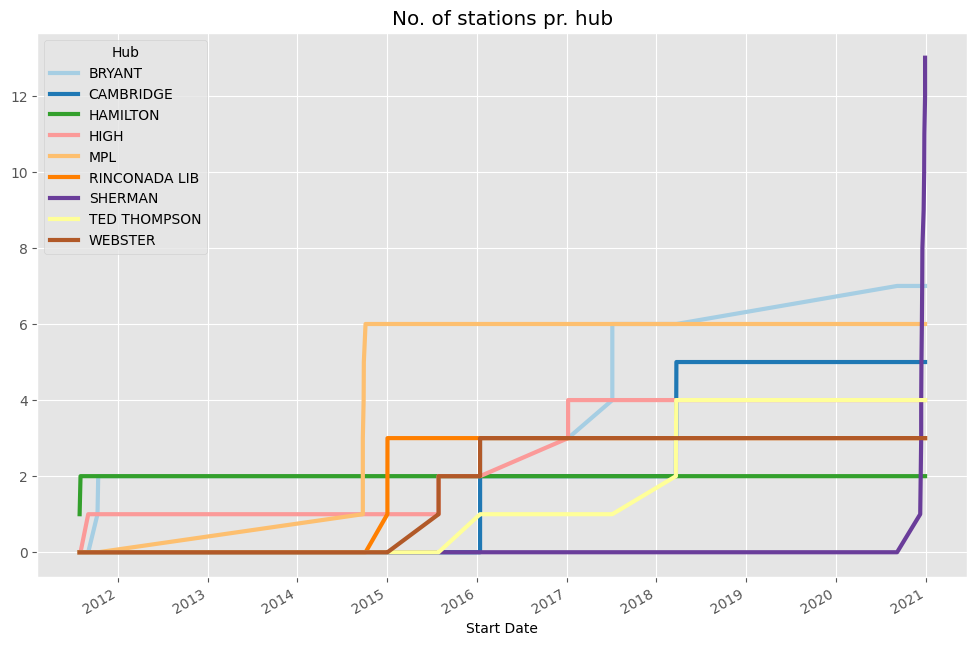

In [27]:
df_hub.plot(figsize=(12, 8), colormap = 'Paired', linewidth = 3, title = 'No. of stations pr. hub')

<Axes: title={'center': 'No. of plugs pr. hub ($\\tau$)'}, xlabel='Start Date'>

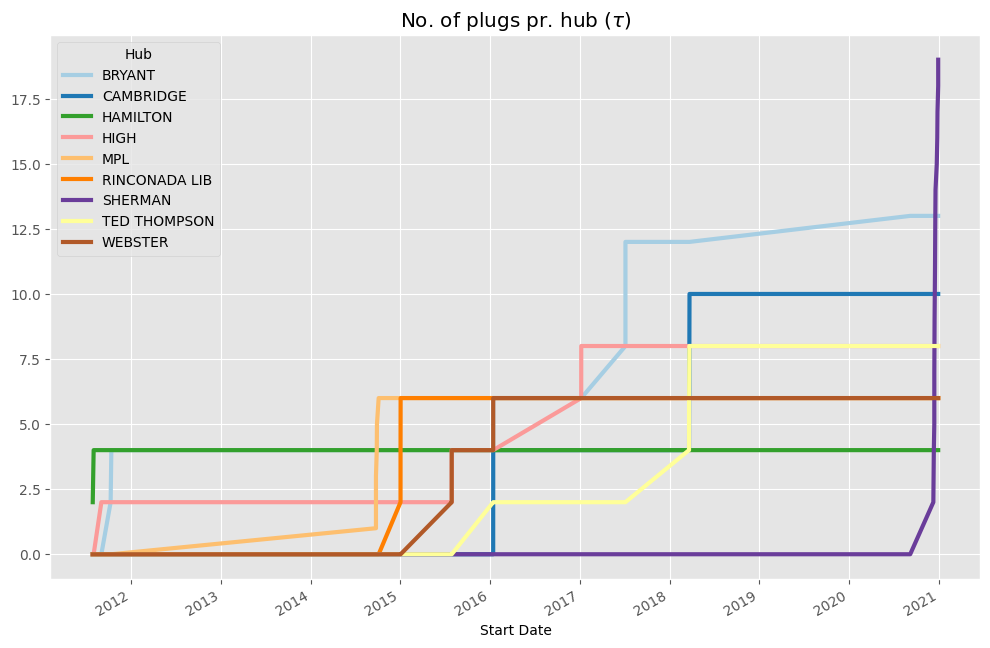

In [68]:
df_plug_hub.plot(figsize=(12, 8), colormap = 'Paired', linewidth = 3, title = r'No. of plugs pr. hub ($\tau$)')

In [ ]:
https://jdemeritt.weebly.com/uploads/2/2/7/7/22771764/tobit1.pdf